In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.transforms import Bbox
from matplotlib.transforms import Affine2D
from matplotlib.collections import QuadMesh
import seaborn as sns
import scanpy as sc
import scipy
from scipy.spatial.distance import cdist, pdist, squareform
import sklearn

from importlib import reload

import plotting as plt2

In [2]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/scanpy/hsc_landscape.anndata.h5ad"

adata = sc.read_h5ad(fpath)
sc.logging.print_memory_usage()

adata

Memory usage: current 8.74 GB, difference +8.74 GB


AnnData object with n_obs × n_vars = 54347 × 19070
    obs: 'n_counts', 'cell_type', 'dataset', 'organ_tissue', 'n_genes', 'new_cluster', 'cell_label', 'cluster_str', 'UMAP 1', 'UMAP 2'
    var: 'gene_name', 'ensemble_id', 'n_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'B_mem', 'B_naive', 'Baso', 'DC', 'Endo', 'Eos', 'Ery', 'Fibro', 'HSC', 'Macro', 'Mega', 'Mono', 'MDSC', 'Neut', 'Osteo', 'Plasma', 'pDC', 'Retic', 'Stromal', 'cluster_genes'
    uns: 'cell_type_colors', 'dataset_colors', 'go_annotations', 'hvg', 'log1p', 'neighbors', 'new_cluster', 'new_cluster_colors', 'organ_tissue_colors', 'panglaodb', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log_norm', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [8]:
# get the closest cells to the HSC centroid

hsc_data = adata[adata.obs['cell_type'] == 'HSC', :]
X = hsc_data.obsm['X_pca']
centroid = X.mean(axis=0)
print(f"{X.shape=} {centroid.shape=}")

# Calculate Distances (using cdist for efficiency)
distances = cdist(X, [centroid], metric='euclidean')  # Euclidean distance

# Rank Rows (Ascending: closest first)
ranked_indices = np.argsort(distances, axis=0).flatten()
hsc_data.obs.iloc[ranked_indices].head(10)

X.shape=(5798, 50) centroid.shape=(50,)


,n_counts,cell_type,dataset,organ_tissue,n_genes,new_cluster,cell_label,cluster_str,UMAP 1,UMAP 2
CCGTTTGGTGATGAAA-3_young2_HSC,14983.0,HSC,young2_HSC,nan,16234,1,Hematopoietic Stem Cell,D2,8.027943,5.941415
TCGTTAAAGGCATTGT-3_young2_HSC,5257.0,HSC,young2_HSC,nan,15113,0,Hematopoietic Stem Cell,D1,7.630934,7.144272
ACGATTCAGTCTTGAA-1_old2_BMMC_HSPC,6801.0,HSC,old2_BMMC_HSPC,nan,14703,0,Hematopoietic Stem Cell,D1,7.390944,6.821814
GAAGGATGTTCGCGCT-3_young2_HSC,6722.0,HSC,young2_HSC,nan,15270,0,Hematopoietic Stem Cell,D1,6.666128,6.603589
CAAGTTATCCCGCAAA-3_young2_HSC,6411.0,HSC,young2_HSC,nan,15208,0,Hematopoietic Stem Cell,D1,7.477270,6.989740
CGAGGTGAGAAAGCAT-3_young2_HSC,3233.0,HSC,young2_HSC,nan,14626,0,Hematopoietic Stem Cell,D1,7.823510,6.971338
AATCCATCATCCATCT-3_young2_HSC,5127.0,HSC,young2_HSC,nan,15047,0,Hematopoietic Stem Cell,D1,7.589983,6.727928
ATTGTGATCGCATTAA-3_young2_HSC,8160.0,HSC,young2_HSC,nan,15465,0,Hematopoietic Stem Cell,D1,7.476235,6.509196
GGGCATTGTGAGGTAG-3_young2_HSC,13229.0,HSC,young2_HSC,nan,16164,0,Hematopoietic Stem Cell,D1,6.979178,6.184309
CATTTGTTCGCTAGCA-3_young2_HSC,4145.0,HSC,young2_HSC,nan,14895,0,Hematopoietic Stem Cell,D1,8.277568,6.655886


In [19]:
center_cell = "CCGTTTGGTGATGAAA-3_young2_HSC"
adata.uns['iroot'] = np.flatnonzero(adata.obs.loc[center_cell])[0]

components = 7

sc.tl.diffmap(
    adata,  
    n_comps=components,
)
sc.tl.dpt(
    adata, 
    n_dcs=components-1, 
    n_branchings=4,
)

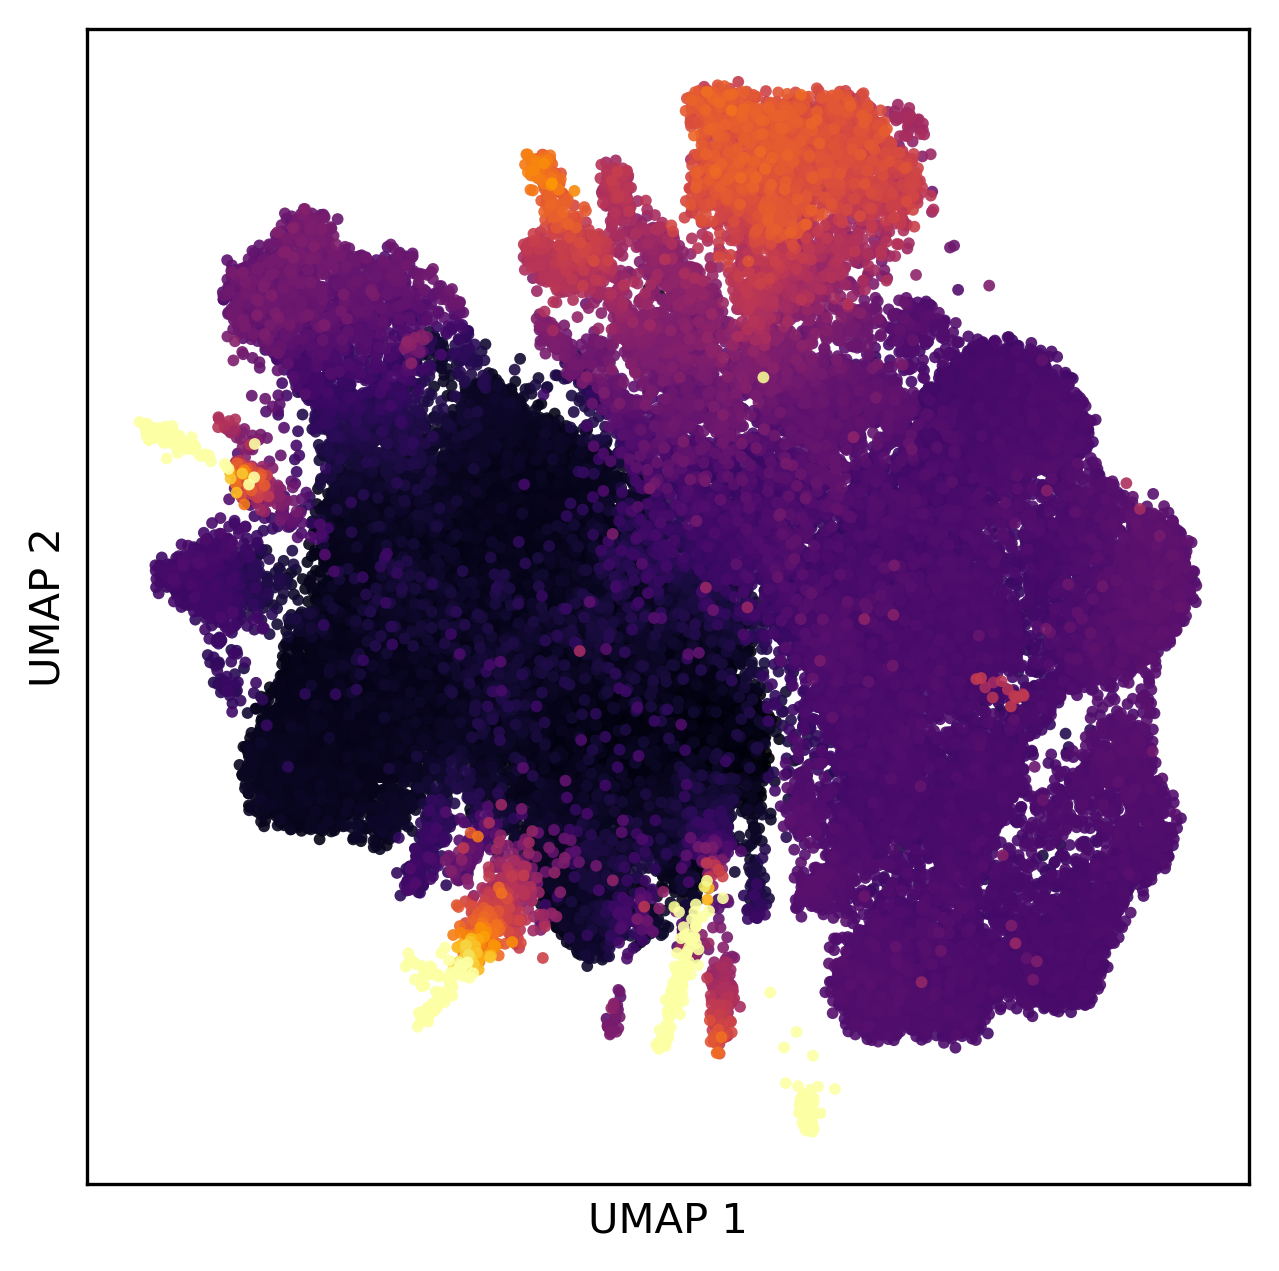

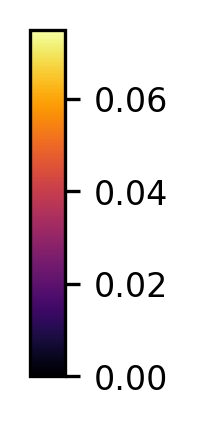

In [24]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 5

plt2.plot_umap_scatter(
    adata, 
    s=8, 
    alpha=0.9, 
    ec='none',
    cmap='inferno',
    vmin=0,
    vmax=0.075,
    # colorbar=False,
    color='dpt_pseudotime',
)